In [1]:
import os
import pandas as pd
import numpy as np
import gossipcat as gc
from gossipcat.Report import Report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas_profiling as pp

In [2]:
wd = '/Users/ewenwang/Documents/practice_data'
os.chdir(wd)
dataFile = 'payment_default.csv'
dataset = pd.read_csv(dataFile, low_memory=False)

In [4]:
pp.ProfileReport(dataset)

Number of variables,25
Number of observations,30000
Total Missing (%),0.0%
Total size in memory,5.7 MiB
Average record size in memory,200.0 B
Numeric,20
Categorical,0
Date,0
Text (Unique),0
Rejected,5
Distinct count,56


In [5]:
target = 'default payment next month'
predictors = [x for x in dataset.columns if x not in [target, 'ID']]

In [5]:
predictors

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [15]:
i, f, o = gc.features_clf(dataset, predictors)

In [16]:
i_c = gc.corr_pairs(dataset[i], gamma = 0.9)
i_c

[('BILL_AMT1', 'BILL_AMT2'),
 ('BILL_AMT5', 'BILL_AMT6'),
 ('BILL_AMT4', 'BILL_AMT5'),
 ('BILL_AMT2', 'BILL_AMT3'),
 ('BILL_AMT3', 'BILL_AMT4'),
 ('BILL_AMT4', 'BILL_AMT6')]

In [17]:
f_c = gc.corr_pairs(dataset[f], gamma = 0.75)
f_c

[]

In [18]:
o

[]

In [19]:
new_features = gc.features_new(dataset, i_c, target, silent=False)

In [20]:
new_features

""


In [3]:
seed = 2017
dtrain, dtest = train_test_split(dataset, test_size=0.33, random_state=seed)

In [21]:
cate_features = 'name:SEX,MARRIAGE'

In [6]:
clf_1 = gc.simAnneal(train=dtrain, target=target, predictors=predictors)


simulating...

INFO: Number of possible iterations given cooling schedule: 160



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min finished


2 T: 10.000, score: 0.7622, std: 0.0076, params: {'max_depth': '7.00', 'subsample': '0.50', 'colsample_bytree': '0.70'}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min finished


3 T: 10.000, score: 0.7638, std: 0.0057, params: {'max_depth': '7.00', 'subsample': '0.80', 'colsample_bytree': '0.70'}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min finished


4 T: 10.000, score: 0.7632, std: 0.0051, params: {'max_depth': '7.00', 'subsample': '0.10', 'colsample_bytree': '0.70'}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min finished


5 T: 10.000, score: 0.7617, std: 0.0061, params: {'max_depth': '7.00', 'subsample': '0.10', 'colsample_bytree': '0.30'}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min finished


6 T: 10.000, score: 0.7656, std: 0.0057, params: {'max_depth': '7.00', 'subsample': '0.90', 'colsample_bytree': '0.30'}

 best score:  0.765559139905 
 best parameters:  {'max_depth': 7, 'subsample': 0.90000000000000002, 'colsample_bytree': 0.29999999999999999}


In [7]:
report = Report(clf_1, dtrain, dtest, target, predictors)


predicting...


In [8]:
report.GN()


Model Report
Accuracy : 0.902139
AUC Score (train): 0.970406
AUC Score (test): 0.774659
             precision    recall  f1-score   support

          0       0.88      0.83      0.86      7759
          1       0.49      0.59      0.53      2141

avg / total       0.80      0.78      0.79      9900




Model Report
Recall metric in the testing dataset:  0.586174684727


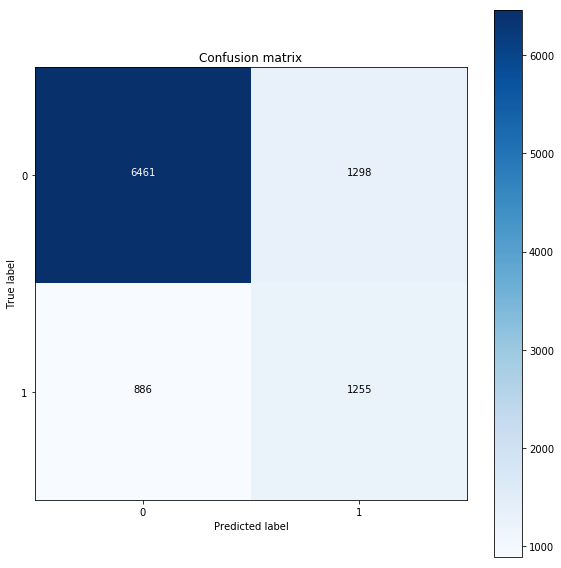

In [9]:
report.CM()


Model Report
Average Precision: 0.5442


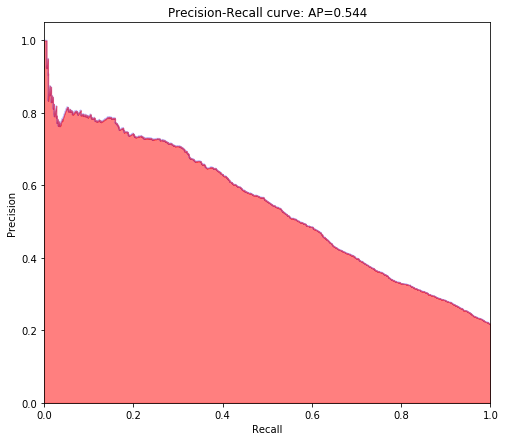

In [10]:
report.PR()

In [11]:
clf_all = gc.simAnneal(train=dataset, target=target, predictors=predictors)


simulating...

INFO: Number of possible iterations given cooling schedule: 160



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished


2 T: 10.000, score: 0.7672, std: 0.0129, params: {'max_depth': '7.00', 'subsample': '0.80', 'colsample_bytree': '0.70'}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   44.5s finished


3 T: 10.000, score: 0.7739, std: 0.0130, params: {'max_depth': '4.00', 'subsample': '0.80', 'colsample_bytree': '0.70'}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   38.3s finished


4 T: 10.000, score: 0.7728, std: 0.0130, params: {'max_depth': '4.00', 'subsample': '0.30', 'colsample_bytree': '0.70'}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   33.1s finished


5 T: 10.000, score: 0.7737, std: 0.0128, params: {'max_depth': '4.00', 'subsample': '0.10', 'colsample_bytree': '0.70'}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   47.1s finished


6 T: 10.000, score: 0.7680, std: 0.0127, params: {'max_depth': '5.00', 'subsample': '0.10', 'colsample_bytree': '0.70'}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   46.9s finished


7 T: 7.500, score: 0.7713, std: 0.0138, params: {'max_depth': '5.00', 'subsample': '0.10', 'colsample_bytree': '0.30'}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   56.4s finished


8 T: 7.500, score: 0.7712, std: 0.0124, params: {'max_depth': '5.00', 'subsample': '0.30', 'colsample_bytree': '0.30'}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished


9 T: 7.500, score: 0.7658, std: 0.0113, params: {'max_depth': '9.00', 'subsample': '0.30', 'colsample_bytree': '0.30'}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.5min finished


10 T: 7.500, score: 0.7622, std: 0.0113, params: {'max_depth': '9.00', 'subsample': '0.30', 'colsample_bytree': '0.80'}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished


11 T: 7.500, score: 0.7652, std: 0.0117, params: {'max_depth': '9.00', 'subsample': '0.30', 'colsample_bytree': '0.40'}

 best score:  0.773902245425 
 best parameters:  {'max_depth': 4, 'subsample': 0.80000000000000004, 'colsample_bytree': 0.69999999999999996}


In [12]:
report_all = Report(clf_all, dataset, dataset, target, predictors)


predicting...



Model Report
Accuracy : 0.816800
AUC Score (train): 0.892124
AUC Score (test): 0.892124
             precision    recall  f1-score   support

          0       0.93      0.83      0.88     23364
          1       0.56      0.77      0.65      6636

avg / total       0.85      0.82      0.83     30000


Model Report
Recall metric in the testing dataset:  0.765069318867


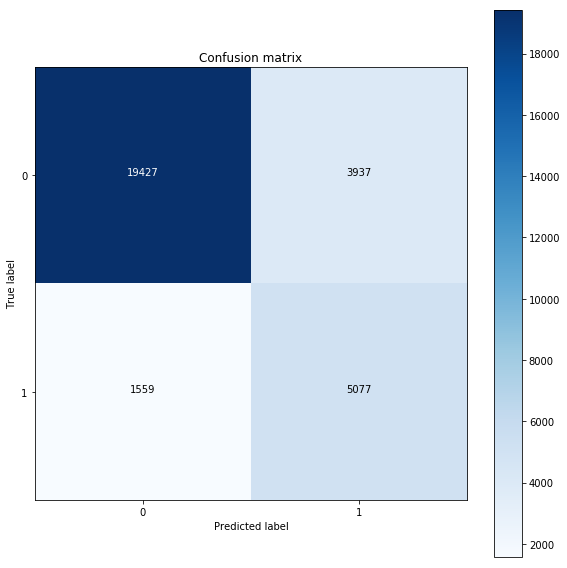


Model Report
Average Precision: 0.7061


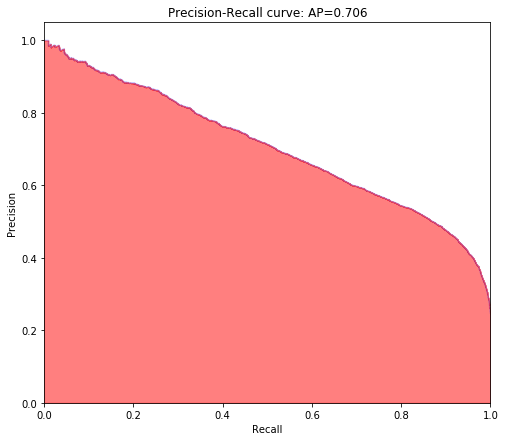

In [16]:
report_all.GN()
report_all.CM()
report_all.PR()

In [10]:
import lightgbm as lgb

In [13]:
lgb.plot_importance(clf_1, figsize=(12, 8), grid=False)

In [14]:
clf_1.feature_importances_

array([ 8338,  1590,  2823,  1862,  9251,  2684,  1562,  1566,  1365,
        1351,  1404, 10481,  9508,  9262,  9561,  9594,  9376,  9740,
        9940,  9822,  9292,  9107, 10350])